## Song Data Analysis

In [29]:
!pip3 install scipy

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mtb
import seaborn as sns
import scipy as scp


In [2]:
# Read the data 
df = pd.read_csv('../data/complete_playlist_data.csv')

In [3]:
df.shape

(1903, 20)

In [4]:
df

name  \
0                          Ehsaan Tera Hoga Mujh Par   
1                       Chahe Mujhe Koi Junglee Kahe   
2                              Mera Saaya Saath Hoga   
3                                    Jhoomka Gira Re   
4                                Lag Ja Gale Se Phir   
...                                              ...   
1898  Pyar Do Pyar Lo - Janbaaz / Soundtrack Version   
1899                                     Dance Dance   
1900                               Aap Ke Aa Jane Se   
1901                     Yeh Mera Dil Yaar Ka Diwana   
1902                                       Hawa Hawa   

                                                  album            artist  \
0          Junglee (Original Motion Picture Soundtrack)   Various Artists   
1          Junglee (Original Motion Picture Soundtrack)   Various Artists   
2       Mera Saaya (Original Motion Picture Soundtrack)       Madan Mohan   
3       Mera Saaya (Original Motion Picture Soundtrack)       Madan Mohan   
4     Woh Kaun Thi? (Original Motion Picture Soundtr...       Madan Mohan   
...                                                 ...               ...   
1898                                            Janbaaz   Various Artists   
1899  Kasam Paida Karnewale Ki (Original Motion Pict...      Bappi Lahiri   
1900      Khudgarz (Original Motion Picture Soundtrack)     Rajesh Roshan   
1901           Don (Original Motion Picture Soundtrack)  Kalyanji-Anandji   
1902                             Hawa Hawa & Other Hits   Hassan Jahangir   

     release_date  length  popularity  key  danceability  acousticness  \
0      2014-01-28  208986          11    4         0.380         0.985   
1      2014-01-28  213720          12    3         0.485         0.925   
2      1966-12-01  363200          12    2         0.557         0.982   
3      1966-12-01  296825          13    8         0.598         0.901   
4      2013-11-01  257613          37    8         0.312         0.796   
...           ...     ...         ...  ...           ...           ...   
1898   1986-01-01  332293          34   11         0.460         0.357   
1899   1984-11-23  339304          21    7         0.604         0.173   
1900   1987-08-19  432293          45    1         0.648         0.170   
1901   1977-12-30  253773          34    7         0.497         0.830   
1902   2017-10-02  369669          44    9         0.575         0.140   

      danceability.1  energy  instrumentalness  liveness  loudness  \
0              0.380   0.389          0.000602     0.151    -7.241   
1              0.485   0.847          0.000000     0.110    -6.312   
2              0.557   0.422          0.100000     0.229   -10.230   
3              0.598   0.787          0.000191     0.812    -4.920   
4              0.312   0.452          0.000874     0.286   -11.872   
...              ...     ...               ...       ...       ...   
1898           0.460   0.874          0.000805     0.146    -8.898   
1899           0.604   0.637          0.000370     0.115   -12.944   
1900           0.648   0.569          0.000089     0.159    -9.185   
1901           0.497   0.476          0.018400     0.332   -11.248   
1902           0.575   0.532          0.000000     0.324   -13.064   

      speechiness    tempo  valence  time_signature  mode  \
0          0.0419  175.505    0.490               4     1   
1          0.0736  147.565    0.803               4     1   
2          0.0285   95.235    0.583               4     1   
3          0.1600   93.159    0.964               4     1   
4          0.0391  132.485    0.391               3     1   
...           ...      ...      ...             ...   ...   
1898       0.2980  127.471    0.646               4     0   
1899       0.1990  165.033    0.384               4     1   
1900       0.1500  123.614    0.678               4     0   
1901       0.0624  141.460    0.521               4     0   
1902       0.1870  125.871    0.914              

In [6]:
# Add date and year 
df['release_date'] = pd.to_datetime(df['release_date'], dayfirst=True, errors = 'coerce')
df

name  \
0                          Ehsaan Tera Hoga Mujh Par   
1                       Chahe Mujhe Koi Junglee Kahe   
2                              Mera Saaya Saath Hoga   
3                                    Jhoomka Gira Re   
4                                Lag Ja Gale Se Phir   
...                                              ...   
1898  Pyar Do Pyar Lo - Janbaaz / Soundtrack Version   
1899                                     Dance Dance   
1900                               Aap Ke Aa Jane Se   
1901                     Yeh Mera Dil Yaar Ka Diwana   
1902                                       Hawa Hawa   

                                                  album            artist  \
0          Junglee (Original Motion Picture Soundtrack)   Various Artists   
1          Junglee (Original Motion Picture Soundtrack)   Various Artists   
2       Mera Saaya (Original Motion Picture Soundtrack)       Madan Mohan   
3       Mera Saaya (Original Motion Picture Soundtrack)       Madan Mohan   
4     Woh Kaun Thi? (Original Motion Picture Soundtr...       Madan Mohan   
...                                                 ...               ...   
1898                                            Janbaaz   Various Artists   
1899  Kasam Paida Karnewale Ki (Original Motion Pict...      Bappi Lahiri   
1900      Khudgarz (Original Motion Picture Soundtrack)     Rajesh Roshan   
1901           Don (Original Motion Picture Soundtrack)  Kalyanji-Anandji   
1902                             Hawa Hawa & Other Hits   Hassan Jahangir   

     release_date  length  popularity  key  danceability  acousticness  \
0      2014-01-28  208986          11    4         0.380         0.985   
1      2014-01-28  213720          12    3         0.485         0.925   
2      1966-12-01  363200          12    2         0.557         0.982   
3      1966-12-01  296825          13    8         0.598         0.901   
4      2013-11-01  257613          37    8         0.312         0.796   
...           ...     ...         ...  ...           ...           ...   
1898   1986-01-01  332293          34   11         0.460         0.357   
1899   1984-11-23  339304          21    7         0.604         0.173   
1900   1987-08-19  432293          45    1         0.648         0.170   
1901   1977-12-30  253773          34    7         0.497         0.830   
1902   2017-10-02  369669          44    9         0.575         0.140   

      danceability.1  energy  instrumentalness  liveness  loudness  \
0              0.380   0.389          0.000602     0.151    -7.241   
1              0.485   0.847          0.000000     0.110    -6.312   
2              0.557   0.422          0.100000     0.229   -10.230   
3              0.598   0.787          0.000191     0.812    -4.920   
4              0.312   0.452          0.000874     0.286   -11.872   
...              ...     ...               ...       ...       ...   
1898           0.460   0.874          0.000805     0.146    -8.898   
1899           0.604   0.637          0.000370     0.115   -12.944   
1900           0.648   0.569          0.000089     0.159    -9.185   
1901           0.497   0.476          0.018400     0.332   -11.248   
1902           0.575   0.532          0.000000     0.324   -13.064   

      speechiness    tempo  valence  time_signature  mode  \
0          0.0419  175.505    0.490               4     1   
1          0.0736  147.565    0.803               4     1   
2          0.0285   95.235    0.583               4     1   
3          0.1600   93.159    0.964               4     1   
4          0.0391  132.485    0.391               3     1   
...           ...      ...      ...             ...   ...   
1898       0.2980  127.471    0.646               4     0   
1899       0.1990  165.033    0.384               4     1   
1900       0.1500  123.614    0.678               4     0   
1901       0.0624  141.460    0.521               4     0   
1902       0.1870  125.871    0.914              

In [7]:
# Add  decade year 
df['year'] = df['release_date'].dt.year
df['decade'] = df['year'] - df['year']%10

In [8]:
## Checking popularity index groupby decade mean
x = df.groupby('decade')['popularity'].mean()
x

decade
1940.0    26.500000
1950.0    19.375000
1960.0    24.684211
1970.0    21.222892
1980.0    37.927273
1990.0    44.445230
2000.0    49.028698
2010.0    36.208219
2020.0    58.228758
Name: popularity, dtype: float64

##DATAFRAME

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1897 non-null   object        
 1   album             1897 non-null   object        
 2   artist            1903 non-null   object        
 3   release_date      1897 non-null   datetime64[ns]
 4   length            1903 non-null   int64         
 5   popularity        1903 non-null   int64         
 6   key               1903 non-null   int64         
 7   danceability      1903 non-null   float64       
 8   acousticness      1903 non-null   float64       
 9   danceability.1    1903 non-null   float64       
 10  energy            1903 non-null   float64       
 11  instrumentalness  1903 non-null   float64       
 12  liveness          1903 non-null   float64       
 13  loudness          1903 non-null   float64       
 14  speechiness       1903 n

## Decade wise data exploration

<AxesSubplot:xlabel='decade', ylabel='danceability.1'>

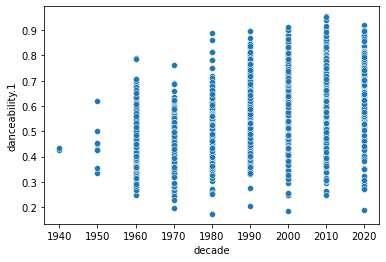

In [10]:
#Dancebility across decade
sns.scatterplot(x='decade', y='danceability.1',
                data=df, )


In [ ]:
#energy across decade
sns.scatterplot(x='energy', y='decade',
                data=df, )

In [ ]:
#acousticness across decade
sns.scatterplot(x='acousticness',y='decade', data=df,)

In [ ]:
sns.scatterplot

In [ ]:
#Energy
sns.scatterplot(x='decade', y='energy',
                data=df, )


In [11]:
## Checking length index groupby decade mean
x = df.groupby('decade')['popularity'].mean()
x

decade
1940.0    26.500000
1950.0    19.375000
1960.0    24.684211
1970.0    21.222892
1980.0    37.927273
1990.0    44.445230
2000.0    49.028698
2010.0    36.208219
2020.0    58.228758
Name: popularity, dtype: float64

In [13]:
## Checking valence index groupby decade mean
x = df.groupby('decade')['valence'].mean()
x

decade
1940.0    0.652000
1950.0    0.683250
1960.0    0.653656
1970.0    0.581602
1980.0    0.621176
1990.0    0.680965
2000.0    0.632962
2010.0    0.621488
2020.0    0.455584
Name: valence, dtype: float64

In [14]:
## Checking valence index groupby decade mean
x = df.groupby('decade')['loudness'].mean()
x 
##Valence is degree of happiness and has a sudden decrease in 2020

decade
1940.0   -12.281000
1950.0   -10.853375
1960.0   -10.237000
1970.0    -9.829169
1980.0    -9.837691
1990.0   -11.064389
2000.0    -7.980609
2010.0    -7.487499
2020.0    -7.958405
Name: loudness, dtype: float64

In [16]:
## Checking valence index groupby decade mean
x = df.groupby('decade')['danceability'].mean()
x 
##Dancebility is increasing

decade
1940.0    0.429500
1950.0    0.446000
1960.0    0.470332
1970.0    0.448536
1980.0    0.503118
1990.0    0.576640
2000.0    0.649448
2010.0    0.611874
2020.0    0.626209
Name: danceability, dtype: float64

In [ ]:
## Checking dancebility index groupby decade mean
x = df.groupby('decade')['danceability'].mean()
x 
##dancebility is increasing

In [22]:
## Checking speechiness index groupby decade mean
x=df.groupby('decade')['speechiness'].mean()
x

decade
1940.0    0.053250
1950.0    0.055400
1960.0    0.070979
1970.0    0.100990
1980.0    0.069704
1990.0    0.058888
2000.0    0.072127
2010.0    0.070099
2020.0    0.065522
Name: speechiness, dtype: float64

In [25]:
#Create a dataframe of decade


In [51]:
## Checking liveness index groupby decade mean
liveness=df.groupby('decade')['liveness'].mean()
liveness

decade
1940.0    0.160100
1950.0    0.330875
1960.0    0.254081
1970.0    0.276040
1980.0    0.252486
1990.0    0.193500
2000.0    0.165404
2010.0    0.197688
2020.0    0.146403
Name: liveness, dtype: float64

In [52]:
x = df['decade'].sort_values().unique()[:-1]
liveness

decade
1940.0    0.160100
1950.0    0.330875
1960.0    0.254081
1970.0    0.276040
1980.0    0.252486
1990.0    0.193500
2000.0    0.165404
2010.0    0.197688
2020.0    0.146403
Name: liveness, dtype: float64

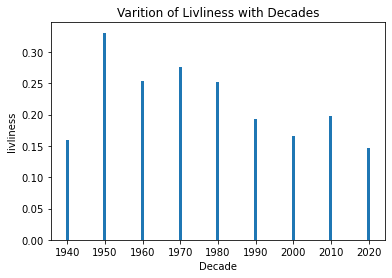

In [53]:
#Ploting livliness graphs 
import matplotlib.pyplot as plt
plt.bar(x, liveness)
plt.xlabel("Decade")
plt.ylabel("livliness")
plt.title("Varition of Livliness with Decades")
plt.show()

In [56]:
## Checking valence index groupby decade mean
valence=df.groupby('decade')['valence'].mean()
valence


decade
1940.0    0.652000
1950.0    0.683250
1960.0    0.653656
1970.0    0.581602
1980.0    0.621176
1990.0    0.680965
2000.0    0.632962
2010.0    0.621488
2020.0    0.455584
Name: valence, dtype: float64

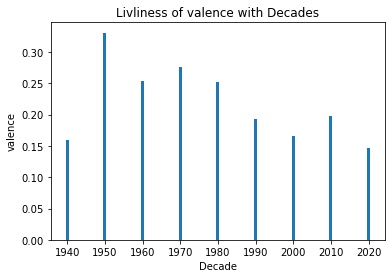

In [57]:
#Ploting valence trend as bar chart 
import matplotlib.pyplot as plt
plt.bar(x, liveness)
plt.xlabel("Decade")
plt.ylabel("valence")
plt.title("Variation of valence with Decades")
plt.show()

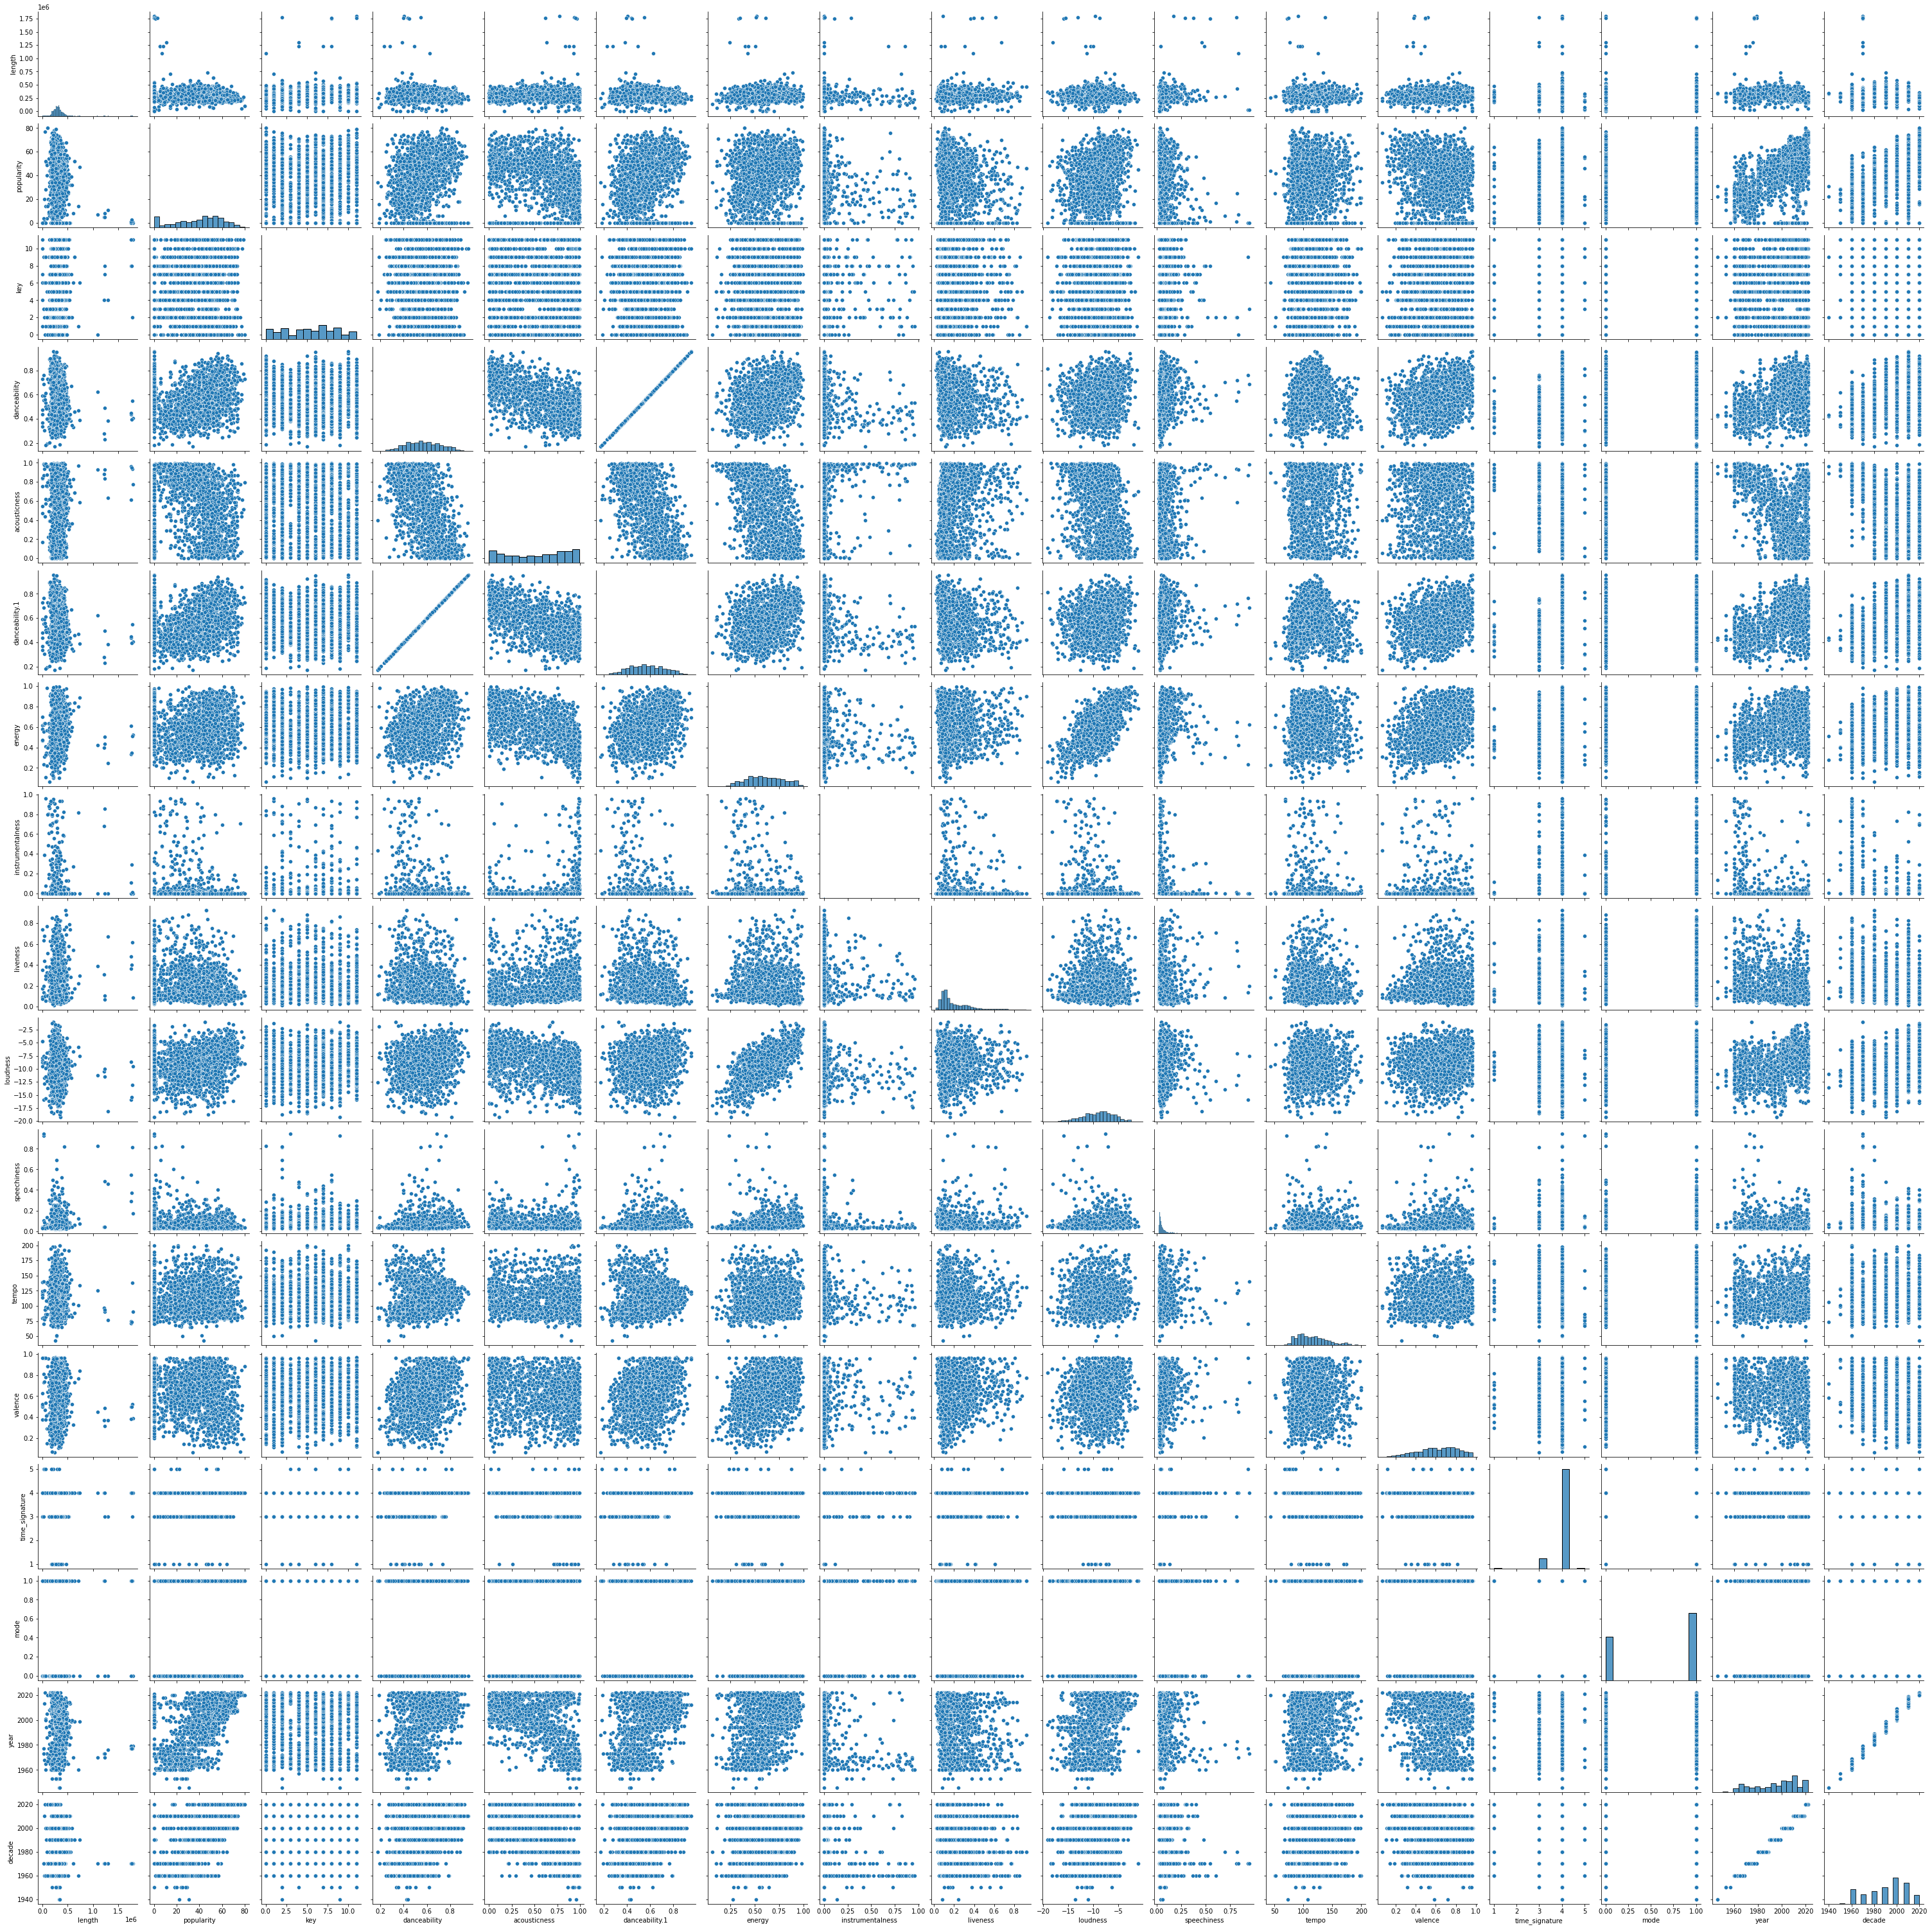

In [58]:
#potify = sns.load_dataset(")
sns.pairplot(df)

In [59]:
df.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'key', 'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'time_signature', 'mode', 'playlist_id', 'year', 'decade'],
      dtype='object')

In [60]:
plot_list = ['length', 'danceability', 'acousticness', 'instrumentalness','valence','liveness','loudness','speechiness','tempo','time_signature']

In [61]:
len(plot_list)

10

In [ ]:
https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.suptitle